# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import requests
import json
import matplotlib.pyplot as plt
from api_keys import wkey
import numpy as np
from citipy import citipy
import pandas as pd
from scipy import stats
import numpy as np


## Generate Cities List

In [2]:
lat = []
lng = []

#for each_lat in np.random.randint(-900, 900, 700):
for each_lat in np.random.randint(-90,90,1500):
    lat.append(each_lat)

#for each_lng in np.random.randint(-180,180, 700):
for each_lng in np.random.randint(-90,90,1500):
    lng.append(each_lng)

lat_long = tuple(zip(lat,lng))



In [3]:
# use citipy to find nearest cities to the lat and long in the list
cities = []
country = []

for lat,lg in lat_long:
    city = citipy.nearest_city(lat,lg)
    
    city_name = city.city_name
    
    cities.append(city_name)
    
    country.append(city.country_code)


In [4]:
#check for duplicates
print("Are there duplicates?: " + str(len(cities) != len(set(cities))))

print("How many counties do we have without duplicates?: " + str(len(set(cities))))

Are there duplicates?: True
How many counties do we have without duplicates?: 600


In [5]:
city_country_df = pd.DataFrame({'City': cities,
                                'Country': country})

city_country_df

,City,Country
0,cape town,za
1,salinopolis,br
2,georgetown,sh
3,kedrovyy,ru
4,hithadhoo,mv
...,...,...
1495,bengkulu,id
1496,uvat,ru
1497,saint-philippe,re
1498,taolanaro,mg


In [6]:
# Create data frame with no dulicates
cleaned_city_country_df = city_country_df.drop_duplicates(subset = ['City'],keep = 'first')
cleaned_city_country_df

,City,Country
0,cape town,za
1,salinopolis,br
2,georgetown,sh
3,kedrovyy,ru
4,hithadhoo,mv
...,...,...
1484,urengoy,ru
1485,sajanan,tn
1488,skagastrond,is
1496,uvat,ru


In [7]:
new_city = cleaned_city_country_df["City"]


In [8]:
#add additional blank columns to store information from openweathermap api
#cleaned_city_country_df['Latitude'] = ''
#cleaned_city_country_df['Longitude'] = ''
#cleaned_city_country_df['Temperature (C)'] = ''
#cleaned_city_country_df['Humidity (%)'] = ''
#cleaned_city_country_df['Cloudiness (%)'] = ''
#cleaned_city_country_df['Wind Speed (kmph)'] = ''

city_name = []
country_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
date_list = []
index_count = 0
set_count = 1



### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
#Set url for API
base_url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "Imperial"

query_url = f"{base_url}appid={wkey}&units={unit}&q="

print("Beginning Data Retrieval")
print("------------------------------")

for index, city in enumerate(new_city, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country_list.append(response["sys"]["country"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        cloudiness_list.append(response["clouds"]["all"])
        wind_speed_list.append(response["wind"]["speed"])
        date_list.append(response["dt"])
        if index_count > 49:
            index_count = 0
            set_count = set_count + 1
    
        else:
            index_count = index_count + 1
            
        print(f"Processing Record {index_count} of Set {set_count} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")
    #time.sleep(1)


print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 : cape town
Processing Record 2 of Set 1 : salinopolis
Processing Record 3 of Set 1 : georgetown
Processing Record 4 of Set 1 : kedrovyy
Processing Record 5 of Set 1 : hithadhoo
Processing Record 6 of Set 1 : malgrat de mar
Processing Record 7 of Set 1 : massakory
Processing Record 8 of Set 1 : ribeira grande
Processing Record 9 of Set 1 : victoria
Processing Record 10 of Set 1 : rawson
Processing Record 11 of Set 1 : east london
Processing Record 12 of Set 1 : hermanus
Processing Record 13 of Set 1 : caravelas
Processing Record 14 of Set 1 : ilulissat
Processing Record 15 of Set 1 : kathmandu
Processing Record 16 of Set 1 : saldanha
Processing Record 17 of Set 1 : kyabe
City not found. Skipping...
Processing Record 18 of Set 1 : ponta delgada
Processing Record 19 of Set 1 : streator
Processing Record 20 of Set 1 : grindavik
Processing Record 21 of Set 1 : bilma
Processing Record 22 of Set 1 : klaksvik

In [10]:
print("You have found weather stats from " + str(len(cloudiness_list)) + " cities.")

You have found weather stats from 547 cities.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
final_weather_df = pd.DataFrame({ 
                "City" : city_name,
                "Country" : country_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Cloudiness (%)" : cloudiness_list,
                "Humidity (%)" : humidity_list,
                "Max Temp (°F)" : max_temp_list,
                "Wind Speed (mph)" : wind_speed_list,
                "Date" : date_list})
final_weather_df

,City,Country,Lat,Lng,Cloudiness (%),Humidity (%),Max Temp (°F),Wind Speed (mph),Date
0,Cape Town,ZA,-33.9258,18.4232,75,92,54.12,5.75,1627592127
1,Salinópolis,BR,-0.6136,-47.3561,17,81,80.49,9.42,1627592613
2,George Town,MY,5.4112,100.3354,20,89,80.53,1.99,1627592390
3,Kedrovyy,RU,56.1667,91.8167,63,61,45.01,3.09,1627592615
4,Hithadhoo,MV,-0.6000,73.0833,100,71,82.49,6.17,1627592616
...,...,...,...,...,...,...,...,...,...
542,Działdowo,PL,53.2396,20.1700,40,67,62.37,8.12,1627593066
543,Urengoy,RU,65.9667,78.3667,64,95,54.32,12.59,1627593138
544,Sajanan,TN,37.0573,9.2426,0,49,81.99,1.77,1627593138
545,Uvat,RU,59.1433,68.8953,45,99,43.54,6.11,1627593140


In [12]:
final_weather_df.describe()

,Lat,Lng,Cloudiness (%),Humidity (%),Max Temp (°F),Wind Speed (mph),Date
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,5.470000e+02
mean,19.541538,5.061224,48.707495,68.674589,69.356124,8.116179,1.627593e+09
std,31.430236,54.976510,39.485176,22.318297,13.567936,5.626067,2.037572e+02
min,-54.800000,-121.655500,0.000000,7.000000,32.770000,0.000000,1.627592e+09
25%,-4.086400,-48.013200,4.000000,56.000000,58.880000,4.105000,1.627593e+09
50%,20.198600,14.966700,47.000000,75.000000,70.430000,6.780000,1.627593e+09
75%,45.161300,44.183850,90.000000,86.000000,79.710000,10.970000,1.627593e+09
max,78.218600,178.416700,100.000000,100.000000,107.440000,30.490000,1.627593e+09


In [14]:

final_weather_df.to_csv("weatherpy.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

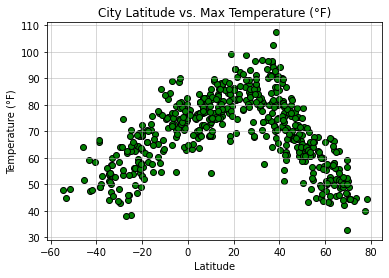

In [15]:
# Make scatter plot
plt.scatter(final_weather_df["Lat"], final_weather_df["Max Temp (°F)"], facecolor = "green", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (°F)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Temperature (°F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

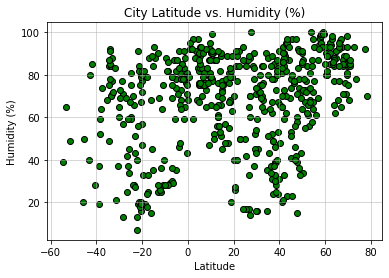

In [16]:
# Make scatter plot
plt.scatter(final_weather_df["Lat"], final_weather_df["Humidity (%)"], facecolor = "green", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (%)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("City Latitude vs Humidity (%).png")

## Latitude vs. Cloudiness Plot

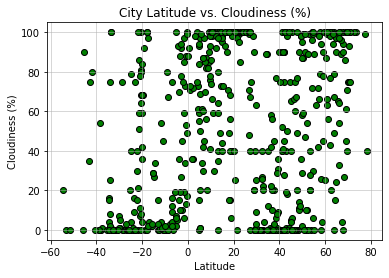

In [17]:
# Make scatter plot
plt.scatter(final_weather_df["Lat"], final_weather_df["Cloudiness (%)"], facecolor = "green", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (%)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("City Latitude vs Cloudiness (%).png")

## Latitude vs. Wind Speed Plot

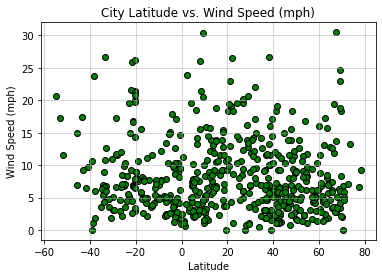

In [18]:
# Make scatter plot
plt.scatter(final_weather_df["Lat"], final_weather_df["Wind Speed (mph)"], facecolor = "green", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Wind Speed (mph)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed (mph)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("City Latitude vs Wind Speed.png")

## Linear Regression

In [19]:

northern_hemi = final_weather_df.loc[final_weather_df["Lat"] >= 0]
southern_hemi = final_weather_df.loc[final_weather_df["Lat"] < 0]
northern_hemi
southern_hemi

,City,Country,Lat,Lng,Cloudiness (%),Humidity (%),Max Temp (°F),Wind Speed (mph),Date
0,Cape Town,ZA,-33.9258,18.4232,75,92,54.12,5.75,1627592127
1,Salinópolis,BR,-0.6136,-47.3561,17,81,80.49,9.42,1627592613
4,Hithadhoo,MV,-0.6000,73.0833,100,71,82.49,6.17,1627592616
9,Rawson,AR,-43.3002,-65.1023,35,40,59.09,17.47,1627592461
10,East London,ZA,-33.0153,27.9116,0,71,59.86,12.62,1627592622
...,...,...,...,...,...,...,...,...,...
519,Ribas do Rio Pardo,BR,-20.4431,-53.7592,8,19,57.52,6.46,1627593108
522,Belmonte,BR,-15.8631,-38.8828,3,89,75.70,4.99,1627593113
523,Charlestown,AU,-32.9500,151.6667,0,72,45.68,5.99,1627593115
524,Manacapuru,BR,-3.2997,-60.6206,10,48,90.18,1.16,1627593117


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

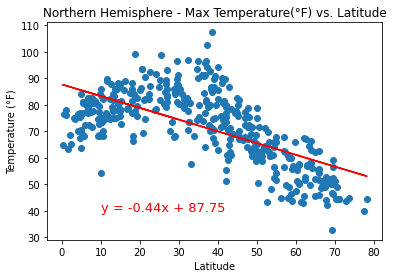

In [20]:
# Make regression
x_value = northern_hemi['Lat']
y_value = northern_hemi['Max Temp (°F)']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.scatter(x_value,y_value)

# Create annotation
plt.annotate(line_eq,(10,40),fontsize=13,color="red")

# Set title
plt.title("Northern Hemisphere - Max Temperature(°F) vs. Latitude")

# Set x axis lable
plt.xlabel('Latitude')

# Set y axis lable
plt.ylabel('Temperature (°F)')

plt.savefig("North Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

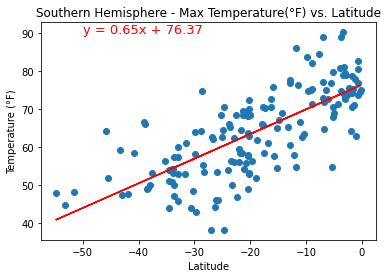

In [21]:
# Make regression
x_value = southern_hemi['Lat']
y_value = southern_hemi["Max Temp (°F)"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.scatter(x_value,y_value)

# Create annotation
plt.annotate(line_eq,(-50,90),fontsize=13,color="red")

# Set title
plt.title("Southern Hemisphere - Max Temperature(°F) vs. Latitude")

# Set x axis lable
plt.xlabel('Latitude')

# Set y axis lable
plt.ylabel('Temperature (°F)')


plt.savefig("South Max Temp vs. Latitude Linear Regression.png")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

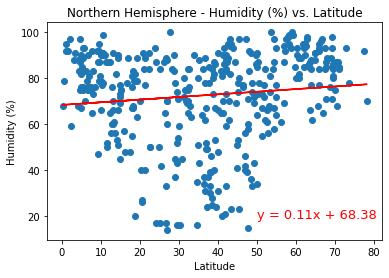

In [22]:
# Make regression
x_value = northern_hemi['Lat']
y_value = northern_hemi['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.scatter(x_value,y_value)

# Create annotation
plt.annotate(line_eq,(50,19),fontsize=13,color="red")

# Set title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")

# Set x axis lable
plt.xlabel('Latitude')

# Set y axis lable
plt.ylabel('Humidity (%)')

plt.savefig("Latitude vs. Humidity Linear Regression.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

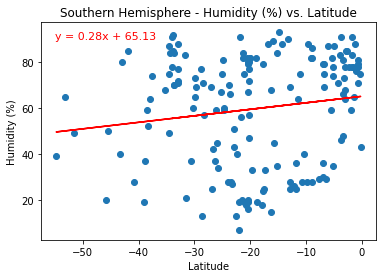

In [23]:
# Make regression
x_value = southern_hemi['Lat']
y_value = southern_hemi['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.scatter(x_value,y_value)

# Create annotation
plt.annotate(line_eq,(-55,90),fontsize=11,color="red")

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")

# Set x axis lable
plt.xlabel('Latitude')

# Set y axis lable
plt.ylabel('Humidity (%)')

plt.savefig("South Latitude vs. Humidity(%) Linear Regression.png")
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

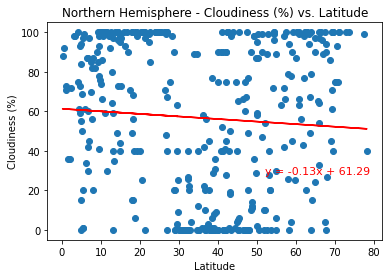

In [24]:
# Make regression
x_value = northern_hemi['Lat']
y_value = northern_hemi['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.scatter(x_value,y_value)

# Create annotation
plt.annotate(line_eq,(52,28),fontsize=11,color="red")

# Set title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")

# Set x axis lable
plt.xlabel('Latitude')

# Set y axis lable
plt.ylabel('Cloudiness (%)')

plt.savefig("North Cloudniness vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

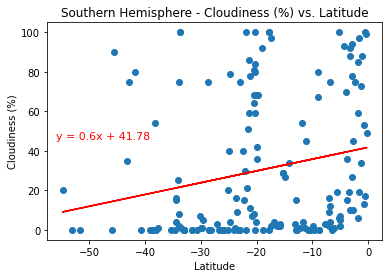

In [25]:
# Make regression
x_value = southern_hemi['Lat']
y_value = southern_hemi['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.scatter(x_value,y_value)

# Create annotation
plt.annotate(line_eq,(-56,46),fontsize=11,color="red")

# Set title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")

# Set x axis lable
plt.xlabel('Latitude')

# Set y axis lable
plt.ylabel('Cloudiness (%)')

plt.savefig("Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

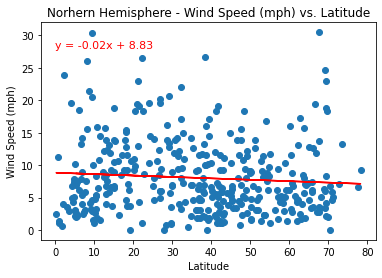

In [26]:
# Make regression
x_value = northern_hemi['Lat']
y_value = northern_hemi['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.scatter(x_value,y_value)

# Create annotation
plt.annotate(line_eq,(0,28),fontsize=11,color="red")

# Set title
plt.title("Norhern Hemisphere - Wind Speed (mph) vs. Latitude")

# Set x axis lable
plt.xlabel('Latitude')

# Set y axis lable
plt.ylabel('Wind Speed (mph)')


plt.savefig("North Wind Speed vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

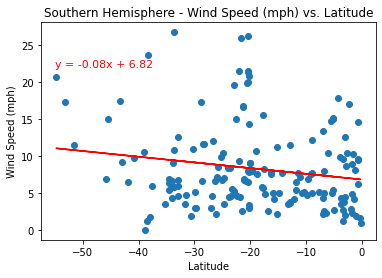

In [27]:
# Make regression
x_value = southern_hemi['Lat']
y_value = southern_hemi['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.scatter(x_value,y_value)

# Create annotation
plt.annotate(line_eq,(-55,22),fontsize=11,color="red")

# Set title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")

# Set x axis lable
plt.xlabel('Latitude')

# Set y axis lable
plt.ylabel('Wind Speed (mph)')

plt.savefig("Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()
